# Problem 19.8 -- Peak identifying

This problem illustrates the calculation of Probability Density Function (PDF) of time series and the calculation of statistical moments of the distributions and their more suitable equivalences.

Import essential packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.signal as sig

Read data from files (You have to look in the file to identify which row you should import).

In [2]:
sig1=np.loadtxt("data/signal1.csv",delimiter=',',dtype=float)
sig2=np.loadtxt("data/signal2.csv",delimiter=',',dtype=float)

#### Plot the time-series

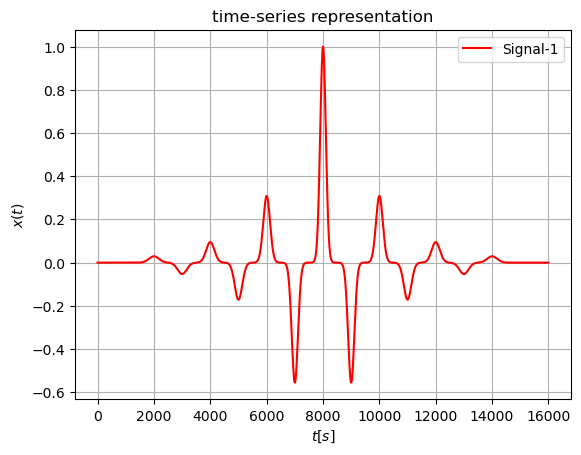

In [3]:
plt.plot(sig1,color='red',label='Signal-1')
plt.xlabel('$t [s]$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.title('time-series representation')
plt.show()

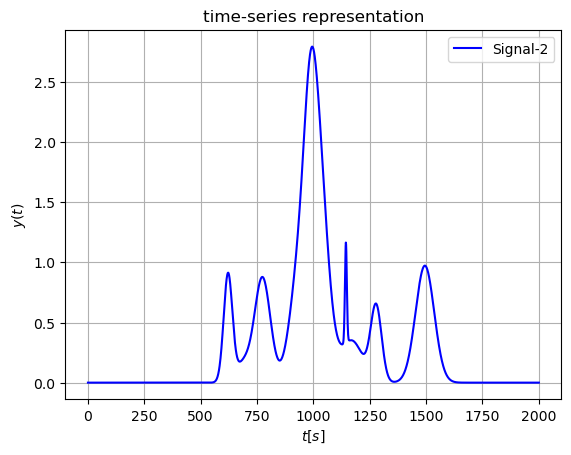

In [4]:
plt.plot(sig2,color='blue',label='Signal-2')
plt.xlabel('$t [s]$')
plt.ylabel('$y(t)$')
plt.grid(True)
plt.legend()
plt.title('time-series representation')
plt.show()

In [5]:
c12 = np.correlate(sig1,sig2,"full")
c11 = np.correlate(sig1,sig1,"full")
c22 = np.correlate(sig2,sig2,"full")

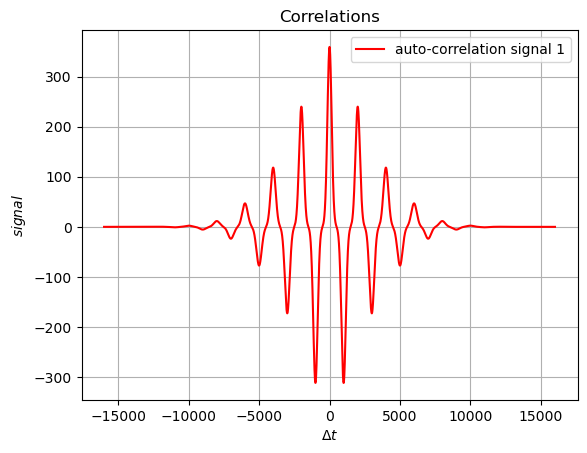

In [7]:
num1 = sig1.size
tt1 = np.linspace(-num1, num1, 2*num1-1)
plt.plot(tt1,c11,color='red',label="auto-correlation signal 1")
plt.xlabel('$\Delta t$')
plt.ylabel('$signal$')
plt.grid(True)
plt.legend()
plt.title('Correlations')
plt.show()

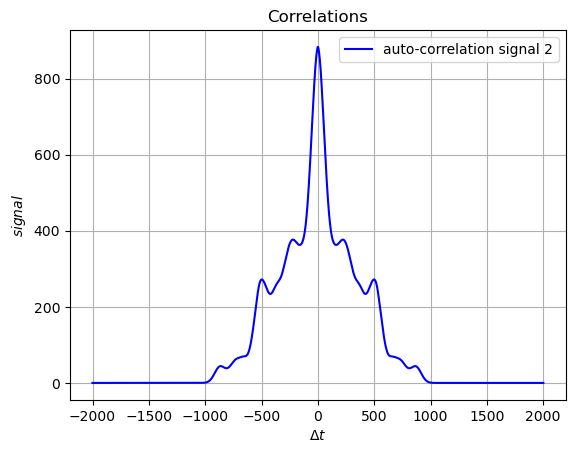

In [8]:
num2 = sig2.size
tt2 = np.linspace(-num2, num2, 2*num2-1)
plt.plot(tt2,c22,color='blue',label="auto-correlation signal 2")
plt.xlabel('$\Delta t$')
plt.ylabel('$signal$')
plt.grid(True)
plt.legend()
plt.title('Correlations')
plt.show()

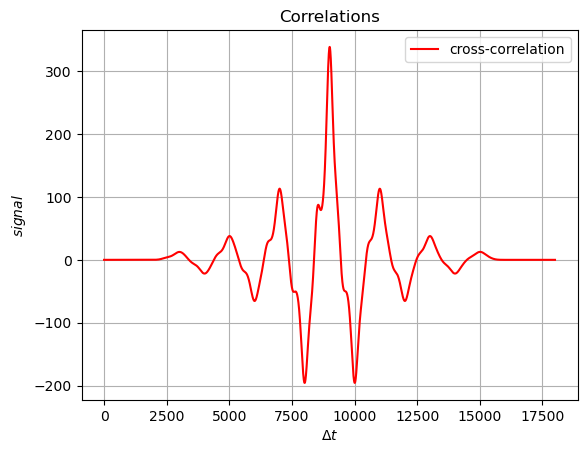

In [9]:
ttc = np.linspace(-num1, num2, num1+num2-1)
plt.plot(c12,color='red',label="cross-correlation")
plt.xlabel('$\Delta t$')
plt.ylabel('$signal$')
plt.grid(True)
plt.legend()
plt.title('Correlations')
plt.show()

#### Calculate the statistical moments of the two time-series

In [11]:
moment1 = np.zeros(5, dtype=float)
moment2 = np.zeros(5, dtype=float)

for i in range(moment1.size):
    moment1[i] = stats.moment(sig1,moment=i)
for i in range(moment2.size):
    moment2[i] = stats.moment(sig2,moment=i)

print('\nThe first 5 statistical moments of the 2-level-PDF are (starting from zero): ')
print(moment1)
print('\nThe first 5 statistical moments of the Normal-dist PDF are (starting from zero): ')
print(moment2)


The first 5 statistical moments of the 2-level-PDF are (starting from zero): 
[1.         0.         0.02242803 0.005878   0.00956031]

The first 5 statistical moments of the Normal-dist PDF are (starting from zero): 
[1.         0.         0.32602192 0.46357137 1.00856396]


#### Present the statistical moments in more suitable representation

In [12]:
meanf2 = np.mean(sig1)
stdevf2 = np.std(sig1)
varf2 = np.var(sig1)
kurtf2 = stats.kurtosis(sig1)
skewf2 = stats.skew(sig1)

meanfg = np.mean(sig2)
stdevfg = np.std(sig2)
varfg = np.var(sig2)
kurtfg = stats.kurtosis(sig2)
skewfg = stats.skew(sig2)

print('values for the 2-level-PDF: mean = {:.3f}, var = {:.3f},stdev = {:.3f}, skewness = {:.3f}, kurtosis = {:.3f}\n'.format(meanf2,varf2,stdevf2,skewf2,kurtf2))
print('values for the Normal-PDF : mean = {:.3f}, var = {:.3f},stdev = {:.3f}, skewness = {:.3f}, kurtosis = {:.3f}\n'.format(meanfg,varfg,stdevfg,skewfg,kurtfg))



values for the 2-level-PDF: mean = 0.004, var = 0.022,stdev = 0.150, skewness = 1.750, kurtosis = 16.006

values for the Normal-PDF : mean = 0.340, var = 0.326,stdev = 0.571, skewness = 2.490, kurtosis = 6.489

